<a href="https://colab.research.google.com/github/dhanesh-vaghasiya/car-model-predictor/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# 📦 Install all required libraries (Colab-friendly)
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost tqdm


In [39]:
!pip install kaggle

In [40]:
!pip install xgboost


In [41]:
# 🔧 Core Libraries
import numpy as np
import pandas as pd

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# 🧼 Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 🤖 Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 📈 Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [5]:
import kagglehub
kagglehub.login()
# Download latest version

path = kagglehub.dataset_download("CooperUnion/cardataset")

print("Path to dataset files:", path)

100%|██████████| 103k/103k [00:00<00:00, 377kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1


In [6]:
df = pd.read_csv(path + '/data.csv')

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df.sample(50)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
380,Mazda,3,2016,regular unleaded,155.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,41,29,586,22545
5070,Mercedes-Benz,G-Class,2015,premium unleaded (required),536.0,8.0,AUTOMATIC,four wheel drive,4.0,"Factory Tuner,Luxury",Midsize,4dr SUV,14,12,617,137100
9323,GMC,Sierra 1500,2015,regular unleaded,355.0,8.0,AUTOMATIC,four wheel drive,4.0,NaN,Large,Crew Cab Pickup,22,16,549,46510
4816,Suzuki,Forenza,2007,regular unleaded,127.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,28,19,481,16049
3260,Cadillac,CTS,2016,premium unleaded (recommended),268.0,4.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,Performance",Large,Sedan,31,21,1624,45560
6456,Land Rover,LR2,2014,premium unleaded (recommended),240.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury",Compact,4dr SUV,24,17,258,41700
2395,Volkswagen,CC,2015,premium unleaded (recommended),200.0,4.0,MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,32,21,873,32995
8598,Kia,Rondo,2008,regular unleaded,182.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Wagon,26,18,1720,18895
7690,Toyota,Prius v,2017,regular unleaded,134.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Wagon,39,43,2031,30935
6327,Mitsubishi,Lancer Sportback,2014,regular unleaded,168.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,29,22,436,21945


In [8]:
df['Market Category'] = df['Market Category'].fillna('None')


In [9]:
df['Market Category'] = df['Market Category'].apply(lambda x: x.split(','))


In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
market_cat_df = pd.DataFrame(
    mlb.fit_transform(df['Market Category']),
    columns=mlb.classes_,
    index=df.index
)
df = pd.concat([df.drop(columns=['Market Category']), market_cat_df], axis=1)


In [11]:
df.drop(columns=["None"])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,1,0,0,1,0,1,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0


In [12]:
df.dropna(subset=['Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Number of Doors'], inplace=True)
df.reset_index(drop=True, inplace=True)


In [13]:
df.isna().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0


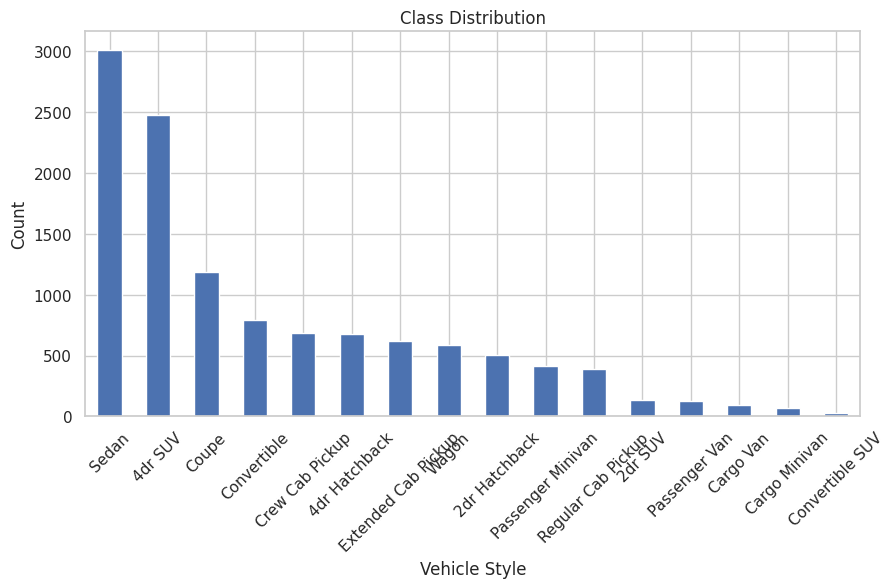

In [14]:
df['Vehicle Style'].value_counts().plot(kind='bar', figsize=(10, 5), title='Class Distribution')
plt.ylabel("Count")
plt.xlabel("Vehicle Style")
plt.xticks(rotation=45)
plt.show()


In [15]:

X = df.drop(columns=['Vehicle Style'])
y = df['Vehicle Style']


le = LabelEncoder()
y = le.fit_transform(df['Vehicle Style'])   # You encoded the target
class_names = le.classes_

# Numeric columns (you can tweak this as needed)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns (excluding binary columns created earlier)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()



In [16]:

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for numeric and categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # keep binary features from Market Category
)

In [17]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [54]:

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Year', 'Engine HP',
                                                   'Engine Cylinders',
                                                   'Number of Doors',
                                                   'highway MPG', 'city mpg',
                                                   'Popularity', 'MSRP',
                                                   'Crossover', 'Diesel',
                                                   'Exotic', 'Factory Tuner',
                                                   'Flex Fuel', 'Hatchback',
                                                   'High-Performance', 'Hybrid',
                                                   'Luxury', 'None',
                                                   'Performance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model',
                                                   'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [48]:
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])


In [42]:
model_xgb = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax',
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    ))
])


In [43]:
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 6],
}


In [49]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],  # 'l1' only works with solver='liblinear'
    'classifier__solver': ['lbfgs'],  # safe choice for multiclass + l2
}


In [55]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': ['balanced']  # to help with imbalance
}


In [50]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=3,                      # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1                  # use all cores
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Engine '
                                                                          'HP',
                                                                          'Engine '
                                                                          'Cylinders',
                                                                          'Number '
                                                                          'of '
                                                                          'Doors',
                                                                          'highway '
                                                                          'MPG',
                                                                          'city '
                                                                          'mpg',
                                                                          'Popularity',
                                                                          'MSRP',
                                                                          'Crossover',
                                                                          'Diesel',
                                                                          'Exotic',
                                                                          'Factory '
                                                                          'Tuner',
                                                                          'Flex '
                                                                          'Fuel',
                                                                          'Hatchback',
                                                                          'High-Performance',
                                                                          'Hybrid',
                                                                          '...
                                                                          'Performance']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Make',
                                                                          'Model',
                                                                          'Engine '
                                                                          'Fuel '
                                                                          'Type',
                                                                          'Transmission '
                                                                          'Type',
                                                                          'Driven_Wheels',
                                                                          'Vehicle '
                                                                          'Size'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs']},
             scoring='accuracy')

In [57]:
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(
    model_rf,
    param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Engine '
                                                                          'HP',
                                                                          'Engine '
                                                                          'Cylinders',
                                                                          'Number '
                                                                          'of '
                                                                          'Doors',
                                                                          'highway '
                                                                          'MPG',
                                                                          'city '
                                                                          'mpg',
                                                                          'Popularity',
                                                                          'MSRP',
                                                                          'Crossover',
                                                                          'Diesel',
                                                                          'Exotic',
                                                                          'Factory '
                                                                          'Tuner',
                                                                          'Flex '
                                                                          'Fuel',
                                                                          'Hatchback',
                                                                          'High-Performance',
                                                                          'Hybrid',
                                                                          '...
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Make',
                                                                          'Model',
                                                                          'Engine '
                                                                          'Fuel '
                                                                          'Type',
                                                                          'Transmission '
                                                                          'Type',
                                                                          'Driven_Wheels',
                                                                          'Vehicle '
                                                                          'Size'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced'],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [45]:
grid_search_xgb = GridSearchCV(
    model_xgb,
    param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:21:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Engine '
                                                                          'HP',
                                                                          'Engine '
                                                                          'Cylinders',
                                                                          'Number '
                                                                          'of '
                                                                          'Doors',
                                                                          'highway '
                                                                          'MPG',
                                                                          'city '
                                                                          'mpg',
                                                                          'Popularity',
                                                                          'MSRP',
                                                                          'Crossover',
                                                                          'Diesel',
                                                                          'Exotic',
                                                                          'Factory '
                                                                          'Tuner',
                                                                          'Flex '
                                                                          'Fuel',
                                                                          'Hatchback',
                                                                          'High-Performance',
                                                                          'Hybrid',
                                                                          '...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softmax', ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 6],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [46]:
y_pred_xgb = grid_search_xgb.predict(X_test)

results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'F1 Score (macro)': f1_score(y_test, y_pred_xgb, average='macro'),
    'F1 Score (weighted)': f1_score(y_test, y_pred_xgb, average='weighted'),
}

In [25]:
y_pred = model.predict(X_test)

NotFittedError: Pipeline is not fitted yet.

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))
#run with randomforest

                     precision    recall  f1-score   support

      2dr Hatchback       0.99      0.99      0.99       101
            2dr SUV       0.97      1.00      0.98        28
      4dr Hatchback       0.99      1.00      1.00       136
            4dr SUV       1.00      1.00      1.00       496
      Cargo Minivan       0.80      0.86      0.83        14
          Cargo Van       1.00      0.95      0.97        19
        Convertible       0.78      0.67      0.72       159
    Convertible SUV       1.00      1.00      1.00         6
              Coupe       0.80      0.87      0.84       238
    Crew Cab Pickup       0.83      0.85      0.84       136
Extended Cab Pickup       0.75      0.69      0.72       125
  Passenger Minivan       0.97      0.95      0.96        82
      Passenger Van       0.96      1.00      0.98        25
 Regular Cab Pickup       0.80      0.87      0.83        78
              Sedan       0.96      0.98      0.97       603
              Wagon    

In [51]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, target_names=class_names))
#Run with logistic regression

                     precision    recall  f1-score   support

      2dr Hatchback       1.00      1.00      1.00       101
            2dr SUV       0.96      0.96      0.96        28
      4dr Hatchback       1.00      1.00      1.00       136
            4dr SUV       1.00      0.99      1.00       496
      Cargo Minivan       0.64      1.00      0.78        14
          Cargo Van       1.00      1.00      1.00        19
        Convertible       0.72      0.73      0.73       159
    Convertible SUV       0.86      1.00      0.92         6
              Coupe       0.82      0.81      0.81       238
    Crew Cab Pickup       0.85      0.89      0.87       136
Extended Cab Pickup       0.80      0.70      0.75       125
  Passenger Minivan       0.96      0.91      0.94        82
      Passenger Van       1.00      1.00      1.00        25
 Regular Cab Pickup       0.82      0.92      0.87        78
              Sedan       0.99      0.92      0.95       603
              Wagon    

In [27]:
results = {}

In [52]:

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'F1 Score (macro)': f1_score(y_test, y_pred, average='macro'),
    'F1 Score (weighted)': f1_score(y_test, y_pred, average='weighted'),
}

In [59]:

y_pred_rf = grid_search.predict(X_test)

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'F1 Score (macro)': f1_score(y_test, y_pred_rf, average='macro'),
    'F1 Score (weighted)': f1_score(y_test, y_pred_rf, average='weighted'),
}

In [31]:
model_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [30]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': ['balanced']  # to help with imbalance
}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


In [60]:
results_df = pd.DataFrame(results).T
display(results_df)


,Accuracy,F1 Score (macro),F1 Score (weighted)
Logistic Regression,0.911130,0.899888,0.912302
Random Forest,0.911130,0.899888,0.912302
XGBoost,0.923402,0.914583,0.922032


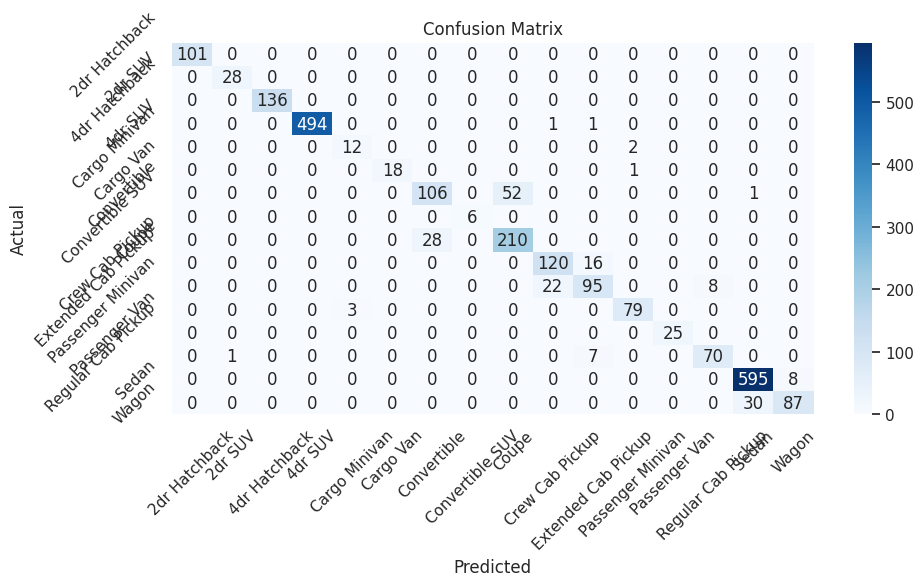

In [61]:

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

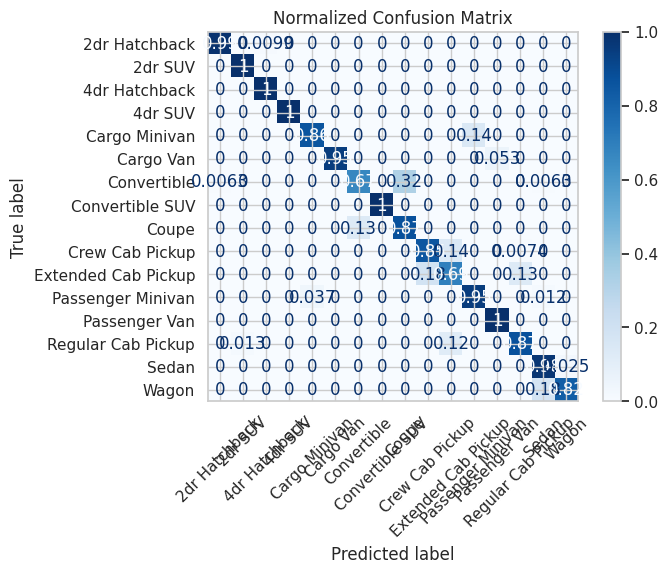

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=class_names,
    cmap='Blues',
    normalize='true',  # ← normalize per actual class
    xticks_rotation=45
)
plt.title("Normalized Confusion Matrix")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


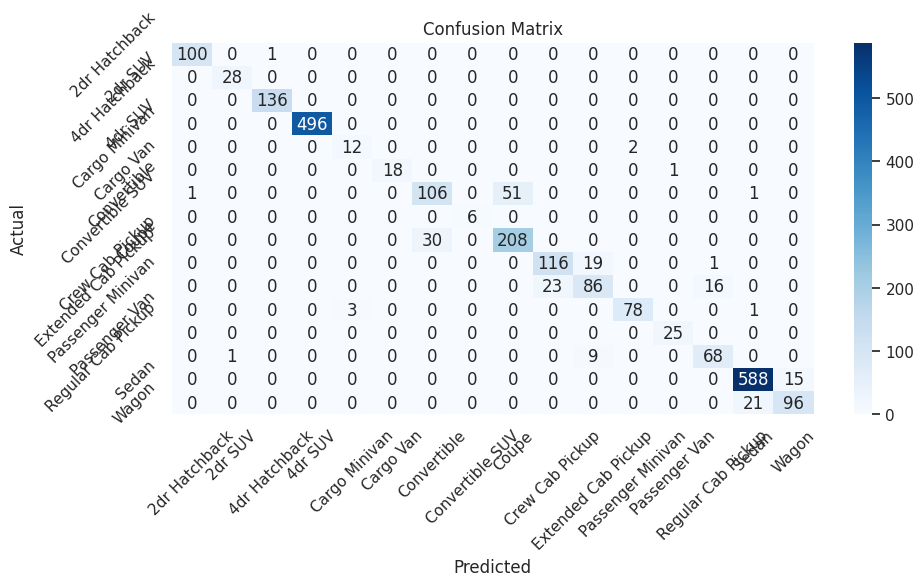

In [ ]:
#from ramdomforest
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()